In [1]:
# Shiv Taneja
#VIT Bhopal
#shiv.taneja2019@vitbhopal.ac.in

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

C:\Users\shiv taneja\AppData\Local\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\shiv taneja\AppData\Local\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\shiv taneja\AppData\Local\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\shiv taneja\AppData\Local\anaconda3\l

## Image Pre-Processing

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_data=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_data=ImageDataGenerator(rescale=1./255)

In [44]:
x_train=train_data.flow_from_directory(r"Hand_digits\traindata",target_size=(96,96),batch_size=10,class_mode="categorical")
x_test=test_data.flow_from_directory(r"Hand_digits\testdata",target_size=(96,96),batch_size=10,class_mode="categorical")

Found 160 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [45]:
x_train.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

In [46]:
x_test.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

## Model Building

In [47]:
model=Sequential()

In [48]:
#add convoultion layer(no.of filters,filter size,input shape,activation function)
model.add(Convolution2D(32,(3,3),input_shape=(96,96,3),activation="relu"))

In [49]:
# add maxpooling(pool_size)
model.add(MaxPooling2D(pool_size=(2,2)))

In [50]:
# flatten layer---input layer of ann
model.add(Flatten())

In [51]:
# hidden layer(units,activation fucniton)
model.add(Dense(units=150,activation="relu"))

In [52]:
# output layer(no.of neurons,activation function)
model.add(Dense(units=10,activation="softmax"))

In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 94, 94, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 47, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 70688)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 150)               10603350  
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1510      
Total params: 10,605,756
Trainable params: 10,605,756
Non-trainable params: 0
_________________________________________________________________


In [54]:
#filter values and weights

In [55]:
# compile the model(optimizer,loss,metric)
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [56]:
# fit the model(x_train,steps per epoch,no.of epochs,vaidation data=test data)
model.fit(x_train,steps_per_epoch=16,epochs=30,validation_steps=5,validation_data=x_test)

Epoch 1/30
16/16 [==============================] - 2s 143ms/step - loss: 8.3330 - acc: 0.1000 - val_loss: 2.7474 - val_acc: 0.1000
Epoch 2/30
16/16 [==============================] - 1s 92ms/step - loss: 2.4500 - acc: 0.1187 - val_loss: 2.3248 - val_acc: 0.1000
Epoch 3/30
16/16 [==============================] - 1s 94ms/step - loss: 2.2751 - acc: 0.1250 - val_loss: 2.2617 - val_acc: 0.1200
Epoch 4/30
16/16 [==============================] - 1s 94ms/step - loss: 2.1753 - acc: 0.2500 - val_loss: 2.2062 - val_acc: 0.1600
Epoch 5/30
16/16 [==============================] - 2s 95ms/step - loss: 2.1127 - acc: 0.2875 - val_loss: 2.1494 - val_acc: 0.2600
Epoch 6/30
16/16 [==============================] - 2s 100ms/step - loss: 1.9480 - acc: 0.3438 - val_loss: 2.0460 - val_acc: 0.2600
Epoch 7/30
16/16 [==============================] - 2s 94ms/step - loss: 1.7961 - acc: 0.5000 - val_loss: 1.9337 - val_acc: 0.3400
Epoch 8/30
16/16 [==============================] - 1s 94ms/step - loss: 1.6982 -

## Save the Model

In [57]:
model.save("hand_digit.h5")

## Test the Model

In [59]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [60]:
model=load_model("hand_digit.h5")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [64]:
img=image.load_img(r"Hand_digits\sample1.png",target_size=(96,96))
s1=image.img_to_array(img)
s1=np.expand_dims(s1,axis=0)
s1.shape

(1, 96, 96, 3)

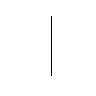

In [65]:
index=[0,1,2,3,4,5,6,7,8,9]
img

In [66]:
result=index[np.argmax(model.predict(s1),axis=1)[0]]
print("Result(Prediction):",result)

Result(Prediction): 1


In [77]:
img=image.load_img("Hand_digits\sample6.png",target_size=(96,96))
s2=image.img_to_array(img)
s2=np.expand_dims(s2,axis=0)
s2.shape

(1, 96, 96, 3)

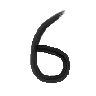

In [78]:
img

In [79]:
result=index[np.argmax(model.predict(s2),axis=1)[0]]
print("Result(Prediction):",result)

Result(Prediction): 6


In [73]:
img=image.load_img("Hand_digits\sample2.png",target_size=(96,96))
s3=image.img_to_array(img)
s3=np.expand_dims(s3,axis=0)

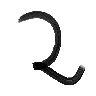

In [74]:
img

In [75]:
result=index[np.argmax(model.predict(s3),axis=1)[0]]
print("Result(Prediction):",result)

Result(Prediction): 2


# End! Thank You!